In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from LSTM import *
from LSTMbis import *
import pandas as pd
import numpy as np
import torch.utils.data as utils
import time

import pdb

torch.manual_seed(1)

In [2]:
import os
data = {}
a=0
for j in range(1,7):
    for i in os.listdir('./new_data/%s'%j):
        if i.endswith('.txt'):
            a = a+1
            data['%s'%a] = pd.read_csv('new_data/{}/{}'.format(j,i), header = None, 
                                        names = ['frameNb','id', 'x','y','Vx','Vy'],
                                           delimiter=' ')

In [3]:
a = 0
inputs = np.zeros([10,len(data),2])
gt = np.zeros([11,len(data),2])
in_coord = np.zeros([10,len(data),2])
gt_coord = np.zeros([11,len(data),2])

for i in data:
    inputs[:,a,:] = np.array(data['%s'%i].loc[0:9,['Vx','Vy']])
    gt[:,a,:] = np.array(data['%s'%i].loc[9:19,['Vx','Vy']])
    in_coord[:,a,:] = np.array(data['%s'%i].loc[0:9,['x','y']])
    gt_coord[:,a,:] = np.array(data['%s'%i].loc[9:19,['x','y']])
    a +=1


inputs = torch.from_numpy(inputs).float()
gt = torch.from_numpy(gt).float()
inputs = inputs.permute([1,0,2])
gt = gt.permute([1,0,2])

In [4]:
from torch import optim

lstm = LSTM(2)
optimizer = optim.SGD(lstm.parameters(), lr=0.05)
criterion = nn.MSELoss()

In [5]:
traindataset = utils.TensorDataset(inputs, gt[:,1:,:])
trainloader = utils.DataLoader(traindataset, batch_size=2, shuffle=True)

epochs = 100
steps = 0
print_every = 100
running_loss = 0 #### DOD

for e in range(epochs):
    start = time.time()
    for train_coord, ground_tru in iter(trainloader):
        steps += 1
        
        train_coord = train_coord.permute([1,0,2])
        ground_tru = ground_tru.permute([1,0,2])

        in_train = Variable(train_coord)
        targets = Variable(ground_tru)
        optimizer.zero_grad()
        #print(in_train.shape)
        #print(targets.shape)
        #pdb.set_trace()
        out = lstm.forward(in_train)
        loss = criterion(out, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]

    
        if steps % print_every == 0:
                stop = time.time()
                print("Epoch: {}/{}..".format(e+1, epochs),
                  "Loss: {:.4f}..".format(running_loss/print_every),
                  "{:.4f} s/batch".format((stop - start)/print_every)
                 )
                running_loss = 0
                start = time.time()

/Users/rodolphefarrando/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch: 1/100.. Loss: 0.1798.. 0.0043 s/batch
Epoch: 1/100.. Loss: 0.1733.. 0.0037 s/batch
Epoch: 1/100.. Loss: 0.1526.. 0.0042 s/batch
Epoch: 1/100.. Loss: 0.1680.. 0.0034 s/batch
Epoch: 1/100.. Loss: 0.1403.. 0.0035 s/batch
Epoch: 1/100.. Loss: 0.1575.. 0.0037 s/batch
Epoch: 1/100.. Loss: 0.1533.. 0.0036 s/batch
Epoch: 1/100.. Loss: 0.1313.. 0.0036 s/batch
Epoch: 1/100.. Loss: 0.1361.. 0.0036 s/batch
Epoch: 1/100.. Loss: 0.1304.. 0.0034 s/batch
Epoch: 1/100.. Loss: 0.1233.. 0.0034 s/batch
Epoch: 1/100.. Loss: 0.1514.. 0.0034 s/batch
Epoch: 1/100.. Loss: 0.1400.. 0.0036 s/batch
Epoch: 1/100.. Loss: 0.1356.. 0.0035 s/batch
Epoch: 1/100.. Loss: 0.1198.. 0.0036 s/batch
Epoch: 1/100.. Loss: 0.1524.. 0.0035 s/batch
Epoch: 1/100.. Loss: 0.1253.. 0.0055 s/batch
Epoch: 1/100.. Loss: 0.1254.. 0.0039 s/batch
Epoch: 1/100.. Loss: 0.1456.. 0.0036 s/batch
Epoch: 1/100.. Loss: 0.1170.. 0.0058 s/batch
Epoch: 1/100.. Loss: 0.1289.. 0.0060 s/batch
Epoch: 1/100.. Loss: 0.1400.. 0.0038 s/batch
Epoch: 1/1

Epoch: 8/100.. Loss: 0.1209.. 0.0035 s/batch
Epoch: 8/100.. Loss: 0.1368.. 0.0035 s/batch
Epoch: 8/100.. Loss: 0.1159.. 0.0035 s/batch
Epoch: 8/100.. Loss: 0.1088.. 0.0034 s/batch
Epoch: 8/100.. Loss: 0.1070.. 0.0035 s/batch
Epoch: 8/100.. Loss: 0.1046.. 0.0035 s/batch
Epoch: 8/100.. Loss: 0.1207.. 0.0035 s/batch
Epoch: 8/100.. Loss: 0.1135.. 0.0034 s/batch
Epoch: 8/100.. Loss: 0.1212.. 0.0037 s/batch
Epoch: 8/100.. Loss: 0.1234.. 0.0033 s/batch
Epoch: 8/100.. Loss: 0.1123.. 0.0033 s/batch
Epoch: 8/100.. Loss: 0.1271.. 0.0035 s/batch
Epoch: 8/100.. Loss: 0.1106.. 0.0035 s/batch
Epoch: 8/100.. Loss: 0.1163.. 0.0034 s/batch
Epoch: 9/100.. Loss: 0.1166.. 0.0033 s/batch
Epoch: 9/100.. Loss: 0.1130.. 0.0035 s/batch
Epoch: 9/100.. Loss: 0.1253.. 0.0034 s/batch
Epoch: 9/100.. Loss: 0.1145.. 0.0035 s/batch
Epoch: 9/100.. Loss: 0.1306.. 0.0036 s/batch
Epoch: 9/100.. Loss: 0.1169.. 0.0035 s/batch
Epoch: 9/100.. Loss: 0.0979.. 0.0034 s/batch
Epoch: 9/100.. Loss: 0.1278.. 0.0034 s/batch
Epoch: 9/1

Epoch: 15/100.. Loss: 0.1211.. 0.0036 s/batch
Epoch: 15/100.. Loss: 0.1175.. 0.0036 s/batch
Epoch: 15/100.. Loss: 0.1055.. 0.0035 s/batch
Epoch: 15/100.. Loss: 0.1153.. 0.0035 s/batch
Epoch: 15/100.. Loss: 0.1036.. 0.0036 s/batch
Epoch: 15/100.. Loss: 0.1171.. 0.0035 s/batch
Epoch: 15/100.. Loss: 0.1125.. 0.0036 s/batch
Epoch: 16/100.. Loss: 0.1281.. 0.0021 s/batch
Epoch: 16/100.. Loss: 0.1116.. 0.0038 s/batch
Epoch: 16/100.. Loss: 0.1096.. 0.0037 s/batch
Epoch: 16/100.. Loss: 0.1227.. 0.0035 s/batch
Epoch: 16/100.. Loss: 0.1133.. 0.0037 s/batch
Epoch: 16/100.. Loss: 0.1149.. 0.0036 s/batch
Epoch: 16/100.. Loss: 0.1123.. 0.0037 s/batch
Epoch: 16/100.. Loss: 0.1261.. 0.0038 s/batch
Epoch: 16/100.. Loss: 0.1192.. 0.0036 s/batch
Epoch: 16/100.. Loss: 0.1216.. 0.0036 s/batch
Epoch: 16/100.. Loss: 0.1189.. 0.0037 s/batch
Epoch: 16/100.. Loss: 0.1236.. 0.0037 s/batch
Epoch: 16/100.. Loss: 0.1199.. 0.0037 s/batch
Epoch: 16/100.. Loss: 0.1130.. 0.0036 s/batch
Epoch: 16/100.. Loss: 0.1224.. 0.0

Epoch: 23/100.. Loss: 0.1049.. 0.0005 s/batch
Epoch: 23/100.. Loss: 0.1018.. 0.0037 s/batch
Epoch: 23/100.. Loss: 0.1036.. 0.0037 s/batch
Epoch: 23/100.. Loss: 0.1261.. 0.0037 s/batch
Epoch: 23/100.. Loss: 0.1116.. 0.0036 s/batch
Epoch: 23/100.. Loss: 0.1137.. 0.0037 s/batch
Epoch: 23/100.. Loss: 0.1230.. 0.0036 s/batch
Epoch: 23/100.. Loss: 0.1223.. 0.0035 s/batch
Epoch: 23/100.. Loss: 0.1180.. 0.0034 s/batch
Epoch: 23/100.. Loss: 0.1234.. 0.0036 s/batch
Epoch: 23/100.. Loss: 0.1105.. 0.0036 s/batch
Epoch: 23/100.. Loss: 0.1235.. 0.0036 s/batch
Epoch: 23/100.. Loss: 0.1116.. 0.0036 s/batch
Epoch: 23/100.. Loss: 0.1016.. 0.0036 s/batch
Epoch: 23/100.. Loss: 0.1274.. 0.0036 s/batch
Epoch: 23/100.. Loss: 0.1147.. 0.0038 s/batch
Epoch: 23/100.. Loss: 0.1114.. 0.0034 s/batch
Epoch: 23/100.. Loss: 0.1062.. 0.0034 s/batch
Epoch: 23/100.. Loss: 0.1123.. 0.0034 s/batch
Epoch: 23/100.. Loss: 0.1314.. 0.0036 s/batch
Epoch: 23/100.. Loss: 0.1137.. 0.0036 s/batch
Epoch: 23/100.. Loss: 0.1246.. 0.0

Epoch: 30/100.. Loss: 0.1269.. 0.0038 s/batch
Epoch: 30/100.. Loss: 0.1033.. 0.0035 s/batch
Epoch: 30/100.. Loss: 0.1275.. 0.0036 s/batch
Epoch: 30/100.. Loss: 0.1084.. 0.0036 s/batch
Epoch: 30/100.. Loss: 0.1047.. 0.0039 s/batch
Epoch: 30/100.. Loss: 0.1257.. 0.0035 s/batch
Epoch: 30/100.. Loss: 0.1074.. 0.0036 s/batch
Epoch: 30/100.. Loss: 0.1285.. 0.0037 s/batch
Epoch: 30/100.. Loss: 0.1267.. 0.0036 s/batch
Epoch: 30/100.. Loss: 0.1214.. 0.0034 s/batch
Epoch: 30/100.. Loss: 0.1247.. 0.0034 s/batch
Epoch: 30/100.. Loss: 0.1177.. 0.0035 s/batch
Epoch: 30/100.. Loss: 0.1147.. 0.0036 s/batch
Epoch: 30/100.. Loss: 0.1218.. 0.0036 s/batch
Epoch: 30/100.. Loss: 0.0973.. 0.0039 s/batch
Epoch: 30/100.. Loss: 0.1247.. 0.0035 s/batch
Epoch: 30/100.. Loss: 0.1012.. 0.0034 s/batch
Epoch: 30/100.. Loss: 0.0971.. 0.0034 s/batch
Epoch: 31/100.. Loss: 0.1082.. 0.0003 s/batch
Epoch: 31/100.. Loss: 0.1291.. 0.0036 s/batch
Epoch: 31/100.. Loss: 0.1150.. 0.0038 s/batch
Epoch: 31/100.. Loss: 0.1231.. 0.0

Epoch: 37/100.. Loss: 0.0994.. 0.0035 s/batch
Epoch: 37/100.. Loss: 0.1065.. 0.0035 s/batch
Epoch: 37/100.. Loss: 0.1095.. 0.0035 s/batch
Epoch: 37/100.. Loss: 0.1012.. 0.0038 s/batch
Epoch: 37/100.. Loss: 0.1217.. 0.0035 s/batch
Epoch: 37/100.. Loss: 0.1161.. 0.0034 s/batch
Epoch: 37/100.. Loss: 0.1151.. 0.0036 s/batch
Epoch: 37/100.. Loss: 0.1128.. 0.0036 s/batch
Epoch: 37/100.. Loss: 0.1063.. 0.0037 s/batch
Epoch: 37/100.. Loss: 0.1266.. 0.0037 s/batch
Epoch: 37/100.. Loss: 0.1323.. 0.0038 s/batch
Epoch: 37/100.. Loss: 0.1266.. 0.0036 s/batch
Epoch: 38/100.. Loss: 0.1165.. 0.0026 s/batch
Epoch: 38/100.. Loss: 0.1050.. 0.0036 s/batch
Epoch: 38/100.. Loss: 0.1184.. 0.0037 s/batch
Epoch: 38/100.. Loss: 0.1202.. 0.0036 s/batch
Epoch: 38/100.. Loss: 0.1070.. 0.0036 s/batch
Epoch: 38/100.. Loss: 0.1189.. 0.0036 s/batch
Epoch: 38/100.. Loss: 0.1143.. 0.0036 s/batch
Epoch: 38/100.. Loss: 0.1086.. 0.0036 s/batch
Epoch: 38/100.. Loss: 0.1295.. 0.0035 s/batch
Epoch: 38/100.. Loss: 0.1284.. 0.0

Epoch: 44/100.. Loss: 0.1137.. 0.0036 s/batch
Epoch: 44/100.. Loss: 0.1143.. 0.0037 s/batch
Epoch: 44/100.. Loss: 0.1244.. 0.0038 s/batch
Epoch: 44/100.. Loss: 0.0983.. 0.0037 s/batch
Epoch: 44/100.. Loss: 0.1072.. 0.0034 s/batch
Epoch: 45/100.. Loss: 0.1220.. 0.0012 s/batch
Epoch: 45/100.. Loss: 0.1022.. 0.0036 s/batch
Epoch: 45/100.. Loss: 0.1144.. 0.0036 s/batch
Epoch: 45/100.. Loss: 0.1194.. 0.0036 s/batch
Epoch: 45/100.. Loss: 0.1213.. 0.0037 s/batch
Epoch: 45/100.. Loss: 0.1136.. 0.0036 s/batch
Epoch: 45/100.. Loss: 0.1054.. 0.0036 s/batch
Epoch: 45/100.. Loss: 0.1151.. 0.0034 s/batch
Epoch: 45/100.. Loss: 0.1308.. 0.0035 s/batch
Epoch: 45/100.. Loss: 0.1173.. 0.0036 s/batch
Epoch: 45/100.. Loss: 0.1351.. 0.0035 s/batch
Epoch: 45/100.. Loss: 0.1081.. 0.0036 s/batch
Epoch: 45/100.. Loss: 0.0951.. 0.0037 s/batch
Epoch: 45/100.. Loss: 0.1172.. 0.0036 s/batch
Epoch: 45/100.. Loss: 0.1264.. 0.0036 s/batch
Epoch: 45/100.. Loss: 0.0933.. 0.0037 s/batch
Epoch: 45/100.. Loss: 0.1169.. 0.0

Epoch: 52/100.. Loss: 0.1178.. 0.0045 s/batch
Epoch: 52/100.. Loss: 0.1113.. 0.0048 s/batch
Epoch: 52/100.. Loss: 0.1144.. 0.0048 s/batch
Epoch: 52/100.. Loss: 0.1281.. 0.0045 s/batch
Epoch: 52/100.. Loss: 0.1044.. 0.0046 s/batch
Epoch: 52/100.. Loss: 0.1145.. 0.0047 s/batch
Epoch: 52/100.. Loss: 0.1180.. 0.0046 s/batch
Epoch: 52/100.. Loss: 0.0987.. 0.0048 s/batch
Epoch: 52/100.. Loss: 0.1354.. 0.0046 s/batch
Epoch: 52/100.. Loss: 0.1271.. 0.0048 s/batch
Epoch: 52/100.. Loss: 0.1398.. 0.0045 s/batch
Epoch: 52/100.. Loss: 0.1038.. 0.0046 s/batch
Epoch: 52/100.. Loss: 0.1280.. 0.0047 s/batch
Epoch: 52/100.. Loss: 0.1193.. 0.0047 s/batch
Epoch: 52/100.. Loss: 0.1215.. 0.0046 s/batch
Epoch: 52/100.. Loss: 0.1172.. 0.0045 s/batch
Epoch: 52/100.. Loss: 0.1038.. 0.0048 s/batch
Epoch: 52/100.. Loss: 0.1141.. 0.0046 s/batch
Epoch: 52/100.. Loss: 0.1088.. 0.0046 s/batch
Epoch: 52/100.. Loss: 0.0998.. 0.0045 s/batch
Epoch: 52/100.. Loss: 0.1023.. 0.0045 s/batch
Epoch: 52/100.. Loss: 0.1062.. 0.0

Epoch: 59/100.. Loss: 0.1196.. 0.0037 s/batch
Epoch: 59/100.. Loss: 0.1102.. 0.0036 s/batch
Epoch: 59/100.. Loss: 0.1164.. 0.0037 s/batch
Epoch: 59/100.. Loss: 0.1168.. 0.0035 s/batch
Epoch: 59/100.. Loss: 0.1136.. 0.0039 s/batch
Epoch: 59/100.. Loss: 0.1174.. 0.0050 s/batch
Epoch: 59/100.. Loss: 0.1059.. 0.0038 s/batch
Epoch: 59/100.. Loss: 0.1125.. 0.0082 s/batch
Epoch: 59/100.. Loss: 0.1274.. 0.0139 s/batch
Epoch: 59/100.. Loss: 0.0992.. 0.0114 s/batch
Epoch: 59/100.. Loss: 0.1217.. 0.0172 s/batch
Epoch: 59/100.. Loss: 0.1128.. 0.0164 s/batch
Epoch: 59/100.. Loss: 0.1096.. 0.0169 s/batch
Epoch: 59/100.. Loss: 0.1106.. 0.0174 s/batch
Epoch: 59/100.. Loss: 0.1010.. 0.0166 s/batch
Epoch: 59/100.. Loss: 0.1128.. 0.0125 s/batch
Epoch: 59/100.. Loss: 0.1316.. 0.0066 s/batch
Epoch: 60/100.. Loss: 0.0992.. 0.0098 s/batch
Epoch: 60/100.. Loss: 0.1048.. 0.0055 s/batch
Epoch: 60/100.. Loss: 0.1066.. 0.0038 s/batch
Epoch: 60/100.. Loss: 0.1192.. 0.0035 s/batch
Epoch: 60/100.. Loss: 0.1161.. 0.0

Epoch: 66/100.. Loss: 0.1043.. 0.0036 s/batch
Epoch: 66/100.. Loss: 0.1036.. 0.0039 s/batch
Epoch: 66/100.. Loss: 0.1167.. 0.0046 s/batch
Epoch: 66/100.. Loss: 0.1105.. 0.0036 s/batch
Epoch: 66/100.. Loss: 0.1211.. 0.0034 s/batch
Epoch: 66/100.. Loss: 0.1100.. 0.0091 s/batch
Epoch: 66/100.. Loss: 0.1026.. 0.0052 s/batch
Epoch: 66/100.. Loss: 0.1082.. 0.0043 s/batch
Epoch: 66/100.. Loss: 0.1393.. 0.0047 s/batch
Epoch: 66/100.. Loss: 0.1053.. 0.0057 s/batch
Epoch: 67/100.. Loss: 0.1051.. 0.0013 s/batch
Epoch: 67/100.. Loss: 0.1097.. 0.0053 s/batch
Epoch: 67/100.. Loss: 0.1127.. 0.0039 s/batch
Epoch: 67/100.. Loss: 0.1125.. 0.0039 s/batch
Epoch: 67/100.. Loss: 0.1102.. 0.0050 s/batch
Epoch: 67/100.. Loss: 0.1051.. 0.0038 s/batch
Epoch: 67/100.. Loss: 0.1316.. 0.0064 s/batch
Epoch: 67/100.. Loss: 0.1219.. 0.0050 s/batch
Epoch: 67/100.. Loss: 0.1171.. 0.0036 s/batch
Epoch: 67/100.. Loss: 0.1255.. 0.0036 s/batch
Epoch: 67/100.. Loss: 0.1064.. 0.0037 s/batch
Epoch: 67/100.. Loss: 0.1078.. 0.0

Epoch: 73/100.. Loss: 0.1014.. 0.0032 s/batch
Epoch: 73/100.. Loss: 0.1123.. 0.0031 s/batch
Epoch: 73/100.. Loss: 0.1187.. 0.0031 s/batch
Epoch: 74/100.. Loss: 0.1048.. 0.0000 s/batch
Epoch: 74/100.. Loss: 0.1151.. 0.0032 s/batch
Epoch: 74/100.. Loss: 0.1018.. 0.0034 s/batch
Epoch: 74/100.. Loss: 0.1198.. 0.0034 s/batch
Epoch: 74/100.. Loss: 0.1058.. 0.0048 s/batch
Epoch: 74/100.. Loss: 0.1095.. 0.0033 s/batch
Epoch: 74/100.. Loss: 0.1213.. 0.0034 s/batch
Epoch: 74/100.. Loss: 0.1301.. 0.0055 s/batch
Epoch: 74/100.. Loss: 0.1286.. 0.0096 s/batch
Epoch: 74/100.. Loss: 0.1294.. 0.0135 s/batch
Epoch: 74/100.. Loss: 0.0992.. 0.0066 s/batch
Epoch: 74/100.. Loss: 0.1030.. 0.0040 s/batch
Epoch: 74/100.. Loss: 0.1173.. 0.0036 s/batch
Epoch: 74/100.. Loss: 0.1080.. 0.0041 s/batch
Epoch: 74/100.. Loss: 0.1251.. 0.0046 s/batch
Epoch: 74/100.. Loss: 0.1377.. 0.0204 s/batch
Epoch: 74/100.. Loss: 0.1209.. 0.0158 s/batch
Epoch: 74/100.. Loss: 0.1052.. 0.0202 s/batch
Epoch: 74/100.. Loss: 0.1085.. 0.0

Epoch: 81/100.. Loss: 0.1198.. 0.0035 s/batch
Epoch: 81/100.. Loss: 0.1280.. 0.0035 s/batch
Epoch: 81/100.. Loss: 0.1137.. 0.0035 s/batch
Epoch: 81/100.. Loss: 0.1142.. 0.0037 s/batch
Epoch: 81/100.. Loss: 0.1115.. 0.0036 s/batch
Epoch: 81/100.. Loss: 0.1152.. 0.0035 s/batch
Epoch: 81/100.. Loss: 0.1022.. 0.0033 s/batch
Epoch: 81/100.. Loss: 0.1186.. 0.0032 s/batch
Epoch: 81/100.. Loss: 0.1155.. 0.0033 s/batch
Epoch: 81/100.. Loss: 0.1104.. 0.0037 s/batch
Epoch: 81/100.. Loss: 0.0952.. 0.0032 s/batch
Epoch: 81/100.. Loss: 0.1076.. 0.0035 s/batch
Epoch: 81/100.. Loss: 0.1058.. 0.0035 s/batch
Epoch: 81/100.. Loss: 0.1132.. 0.0035 s/batch
Epoch: 81/100.. Loss: 0.1118.. 0.0035 s/batch
Epoch: 81/100.. Loss: 0.1271.. 0.0034 s/batch
Epoch: 81/100.. Loss: 0.1116.. 0.0034 s/batch
Epoch: 81/100.. Loss: 0.1239.. 0.0035 s/batch
Epoch: 81/100.. Loss: 0.1178.. 0.0036 s/batch
Epoch: 81/100.. Loss: 0.1186.. 0.0034 s/batch
Epoch: 81/100.. Loss: 0.1120.. 0.0035 s/batch
Epoch: 81/100.. Loss: 0.1125.. 0.0

Epoch: 88/100.. Loss: 0.1169.. 0.0035 s/batch
Epoch: 88/100.. Loss: 0.1114.. 0.0035 s/batch
Epoch: 88/100.. Loss: 0.1052.. 0.0048 s/batch
Epoch: 88/100.. Loss: 0.1044.. 0.0035 s/batch
Epoch: 88/100.. Loss: 0.0945.. 0.0033 s/batch
Epoch: 88/100.. Loss: 0.1058.. 0.0033 s/batch
Epoch: 88/100.. Loss: 0.1135.. 0.0035 s/batch
Epoch: 88/100.. Loss: 0.1154.. 0.0035 s/batch
Epoch: 88/100.. Loss: 0.1167.. 0.0036 s/batch
Epoch: 88/100.. Loss: 0.1202.. 0.0034 s/batch
Epoch: 88/100.. Loss: 0.1150.. 0.0034 s/batch
Epoch: 88/100.. Loss: 0.1161.. 0.0032 s/batch
Epoch: 88/100.. Loss: 0.1052.. 0.0032 s/batch
Epoch: 88/100.. Loss: 0.1255.. 0.0036 s/batch
Epoch: 88/100.. Loss: 0.1359.. 0.0034 s/batch
Epoch: 89/100.. Loss: 0.1218.. 0.0031 s/batch
Epoch: 89/100.. Loss: 0.1129.. 0.0035 s/batch
Epoch: 89/100.. Loss: 0.0996.. 0.0039 s/batch
Epoch: 89/100.. Loss: 0.1000.. 0.0034 s/batch
Epoch: 89/100.. Loss: 0.1060.. 0.0036 s/batch
Epoch: 89/100.. Loss: 0.1009.. 0.0036 s/batch
Epoch: 89/100.. Loss: 0.1037.. 0.0

Epoch: 95/100.. Loss: 0.1184.. 0.0035 s/batch
Epoch: 95/100.. Loss: 0.1038.. 0.0035 s/batch
Epoch: 95/100.. Loss: 0.1089.. 0.0053 s/batch
Epoch: 95/100.. Loss: 0.1241.. 0.0038 s/batch
Epoch: 95/100.. Loss: 0.1161.. 0.0035 s/batch
Epoch: 95/100.. Loss: 0.1126.. 0.0034 s/batch
Epoch: 95/100.. Loss: 0.1328.. 0.0035 s/batch
Epoch: 95/100.. Loss: 0.1106.. 0.0036 s/batch
Epoch: 96/100.. Loss: 0.1213.. 0.0005 s/batch
Epoch: 96/100.. Loss: 0.1086.. 0.0035 s/batch
Epoch: 96/100.. Loss: 0.1171.. 0.0035 s/batch
Epoch: 96/100.. Loss: 0.1193.. 0.0035 s/batch
Epoch: 96/100.. Loss: 0.1226.. 0.0034 s/batch
Epoch: 96/100.. Loss: 0.1060.. 0.0035 s/batch
Epoch: 96/100.. Loss: 0.1129.. 0.0035 s/batch
Epoch: 96/100.. Loss: 0.1165.. 0.0035 s/batch
Epoch: 96/100.. Loss: 0.0985.. 0.0037 s/batch
Epoch: 96/100.. Loss: 0.1016.. 0.0033 s/batch
Epoch: 96/100.. Loss: 0.1158.. 0.0038 s/batch
Epoch: 96/100.. Loss: 0.1201.. 0.0035 s/batch
Epoch: 96/100.. Loss: 0.1051.. 0.0035 s/batch
Epoch: 96/100.. Loss: 0.1176.. 0.0

In [6]:
inputs = inputs.permute([1,0,2])
output_final = lstm.predict(inputs)
output_final = output_final.data.numpy()

## Post processing step
Go back to coordinate:
We have Vx and Vy and we want x and y.
$ V = d/t$
$ d = V*t$
Here t = 0.4s between each point.
Start from data at index 9. Then we add d_x and d_y to the last x and y.

In [7]:
output_coord=np.zeros([11,len(data),2])
for j in range(11):
    for i in range(len(data)):
        if j==0:
            output_coord[j,i,:] = in_coord[9,i,:]
        else:
            output_coord[j,i,:] = output_coord[j-1,i,:]+output_final[j-1,i,:]*0.4
        

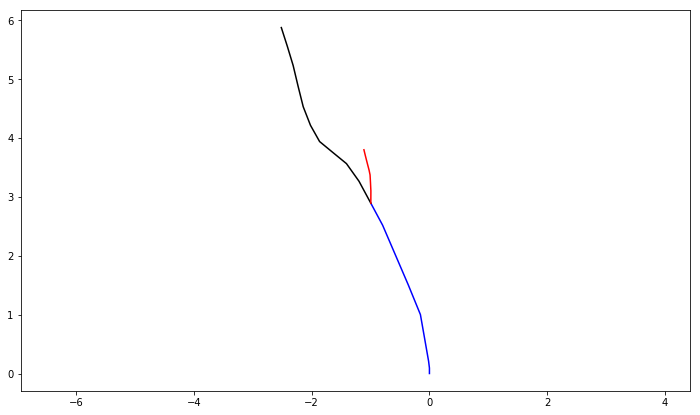

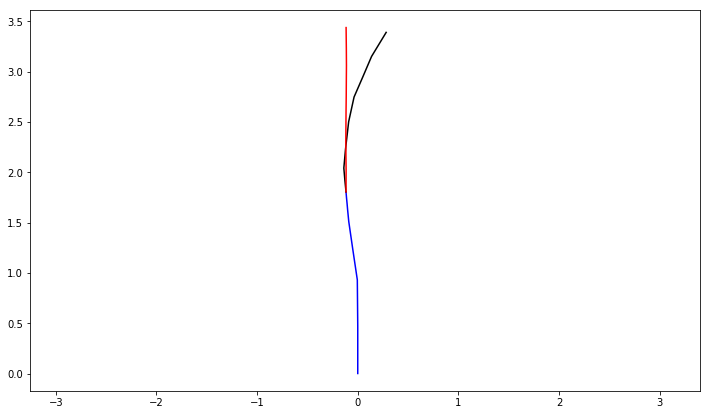

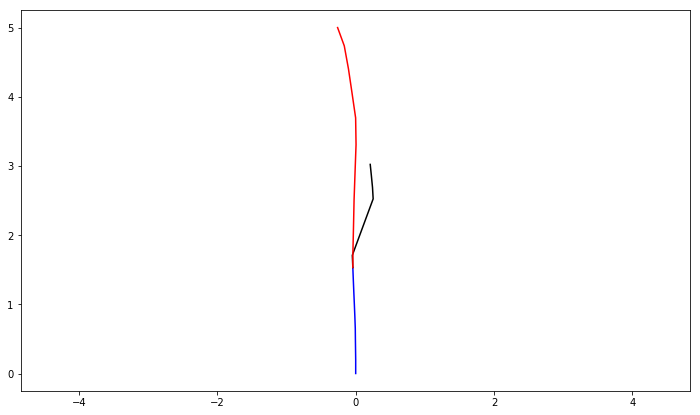

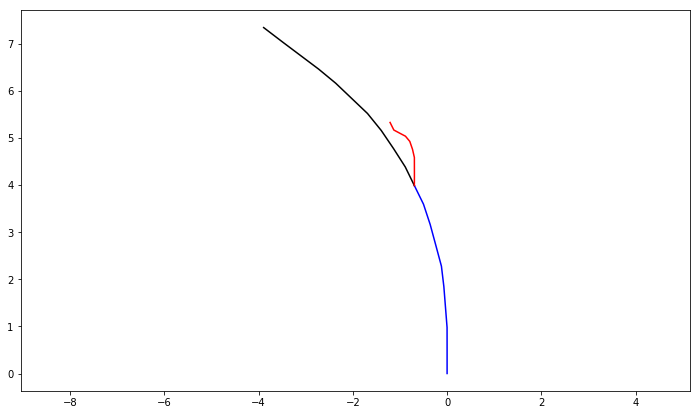

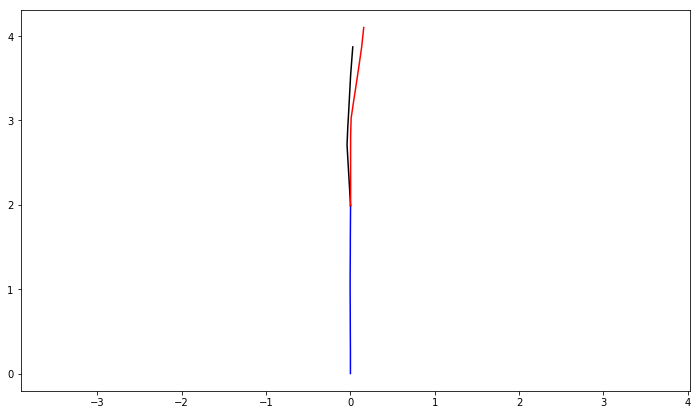

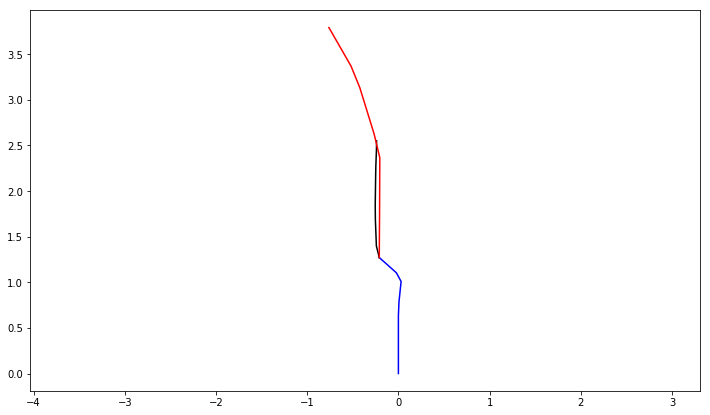

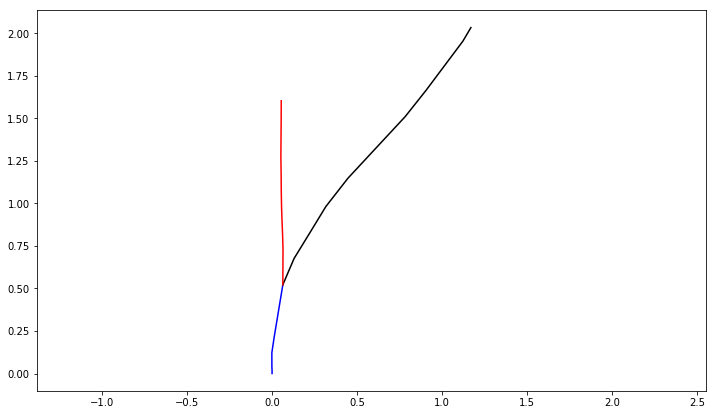

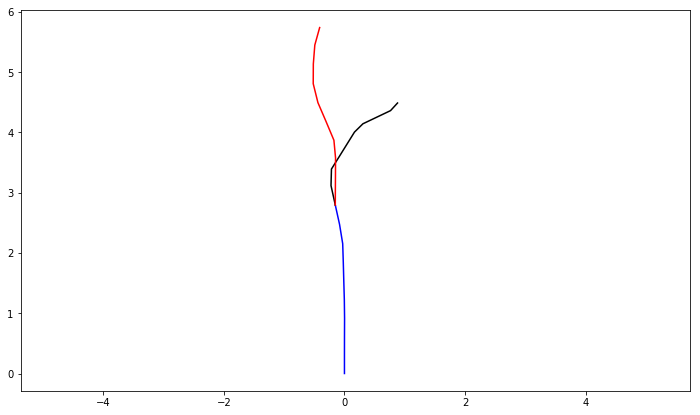

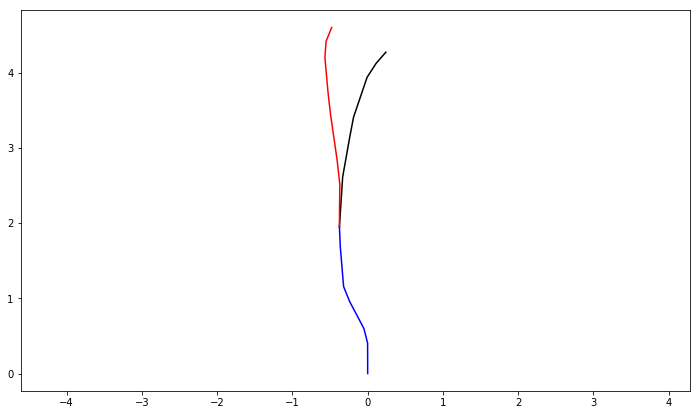

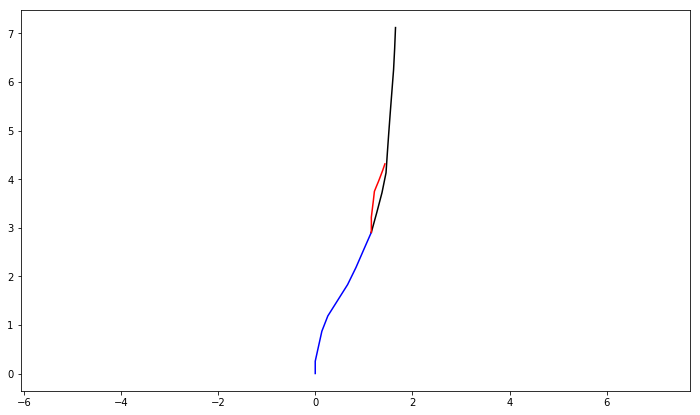

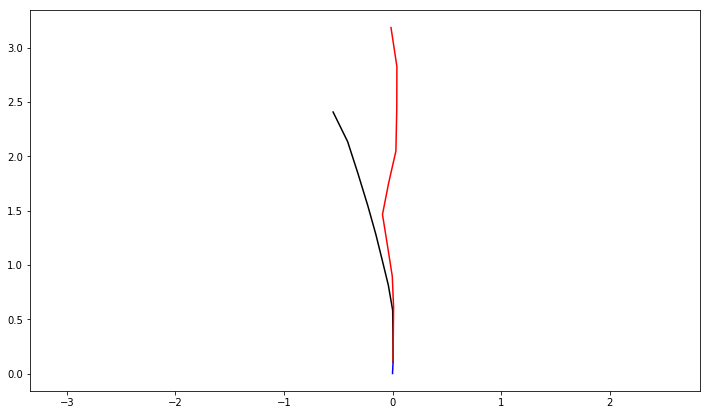

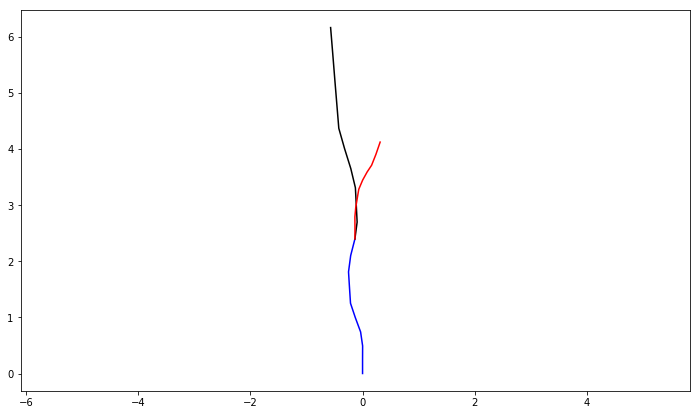

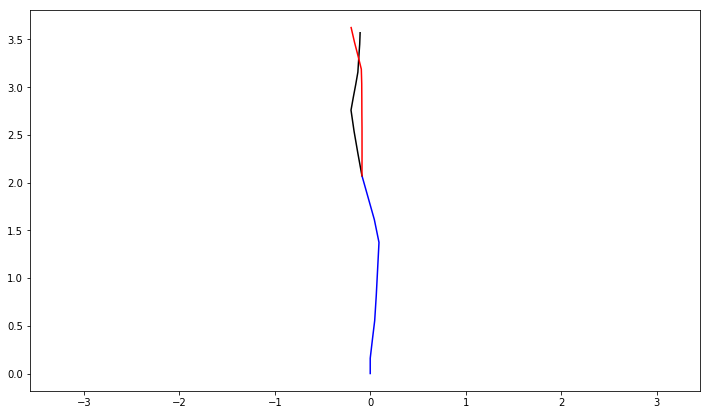

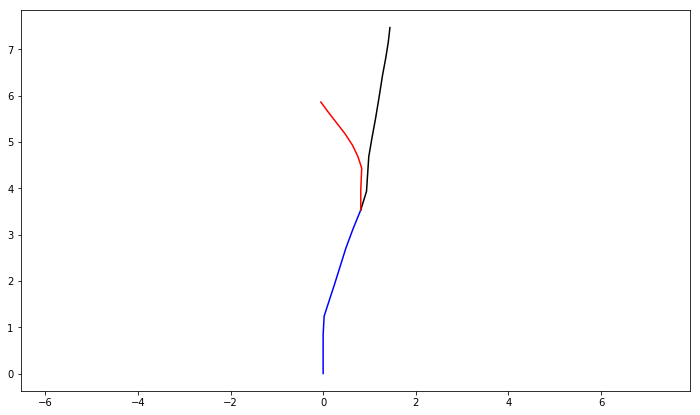

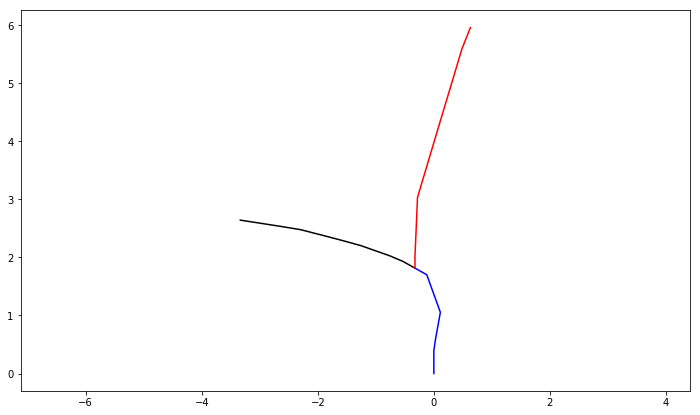

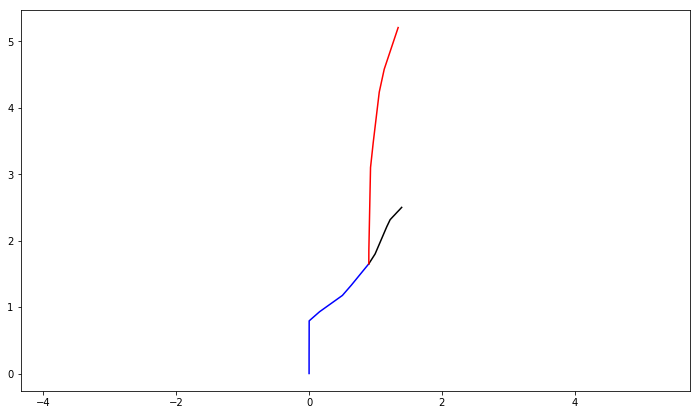

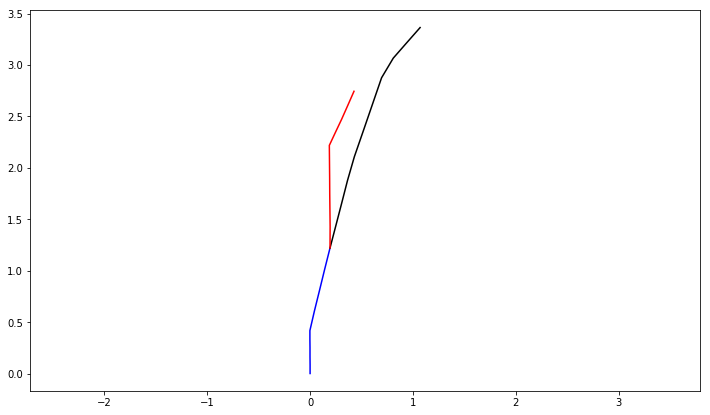

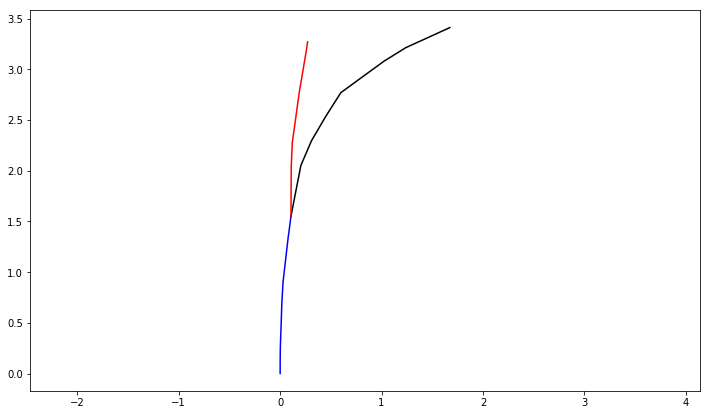

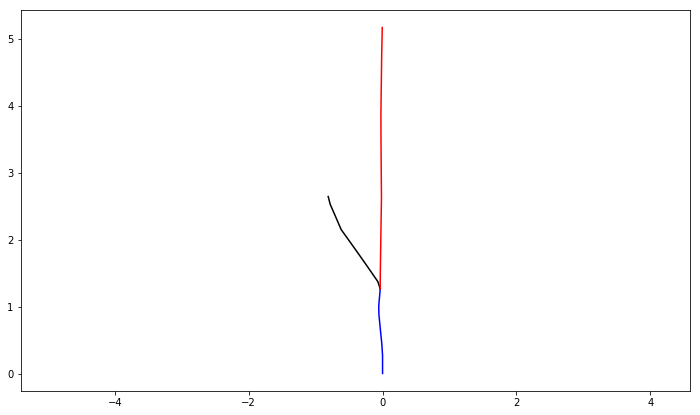

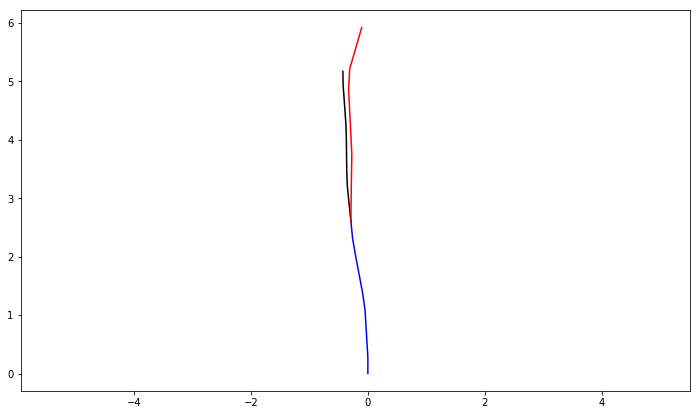

In [10]:
for i in range(20):
    plt.figure(figsize=(12, 7))

    plt.plot(in_coord[:,(i*20)+4000,0],in_coord[:,i*20+4000,1],c='b')
    plt.plot(gt_coord[:,i*20+4000,0],gt_coord[:,i*20+4000,1],c='k')
    plt.plot(output_coord[:,i*20+4000,0],output_coord[:,i*20+4000,1],c='r')
    plt.axis('equal')

In [ ]:
sum(sum(output_final>1))

In [ ]:
np.sum(output_final>1,axis=1)

In [ ]:
len(data)

In [ ]:
max_len = 0
for i in range(1,len(data)+1):
    tmp_len = len(data['%s'%i])
    if tmp_len>max_len:
        max_len = tmp_len
        ind = i
    

In [ ]:
max_len

In [9]:
inputs.shape

torch.Size([10, 4926, 2])